# Comparación de audios usando varias métricas

Los sonidos que usaremos se encuentran en:
https://archive.org/details/panteli_maria_rhythm_dataset

Su referencia es: 
- M. Panteli and S. Dixon. On the Evaluation of Rhythmic and Melodic Descriptors for Music Similarity. In Proceedings of the 17th International Society for Music Information Retrieval Conference, pages 468-474, 2016.

También se encuentran en el github: https://github.com/pedro9olivares/Bourbaki/tree/main/Matematicas-para-la-Ciencia-de-Datos/Modulo-II/Comparacion_audios

In [4]:
!wget https://github.com/pedro9olivares/Bourbaki/raw/refs/heads/main/Matematicas-para-la-Ciencia-de-Datos/Modulo-II/Comparacion_audios/audios.zip

--2025-04-03 19:14:15--  https://github.com/pedro9olivares/Bourbaki/raw/refs/heads/main/Matematicas-para-la-Ciencia-de-Datos/Modulo-II/Comparacion_audios/audios.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pedro9olivares/Bourbaki/refs/heads/main/Matematicas-para-la-Ciencia-de-Datos/Modulo-II/Comparacion_audios/audios.zip [following]
--2025-04-03 19:14:16--  https://raw.githubusercontent.com/pedro9olivares/Bourbaki/refs/heads/main/Matematicas-para-la-Ciencia-de-Datos/Modulo-II/Comparacion_audios/audios.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8942465 (8.5M) [application/zip]
Sav

In [5]:
!unzip audios.zip

Archive:  audios.zip
  inflating: 1_10_1.wav              
  inflating: 1_10_5.wav              
  inflating: 1_10_13.wav             
  inflating: 1_10_25.wav             
  inflating: 1_11_1.wav              
  inflating: 1_11_5.wav              
  inflating: 1_11_13.wav             
  inflating: 1_11_25.wav             
  inflating: 1_12_1.wav              
  inflating: 1_12_5.wav              
  inflating: 1_12_13.wav             
  inflating: 1_12_25.wav             
  inflating: 1_13_1.wav              
  inflating: 1_13_5.wav              
  inflating: 1_13_13.wav             
  inflating: 1_13_25.wav             
  inflating: 1_14_1.wav              
  inflating: 1_14_5.wav              
  inflating: 1_14_13.wav             
  inflating: 1_14_25.wav             
  inflating: 1_15_1.wav              
  inflating: 1_15_5.wav              
  inflating: 1_15_13.wav             
  inflating: 1_15_25.wav             


In [6]:
from scipy.io import wavfile
import numpy as np

import matplotlib.pyplot as plt

In [7]:
aplausos1 = '1_10_1.wav'
fs, aplausos1data = wavfile.read(aplausos1)

In [8]:
fs

44100

audio1data es la señal de audio (is in linear pulse-code modulation (LPCM) format)

In [9]:
aplausos1data

array([13654, 13654, 13654, ..., 13654, 13654, 13654], dtype=int16)

In [10]:
aplausos1data.shape

(352792,)

In [11]:
#Segundos que dura el audio
len(aplausos1data)/44100

7.999818594104308

In [12]:
# Mas informacion:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
# WAV format            Min     Max     NumPy dtype
# 16-bit integer  PCM   -32768  +32767  int16
aplausos1data.dtype

dtype('int16')

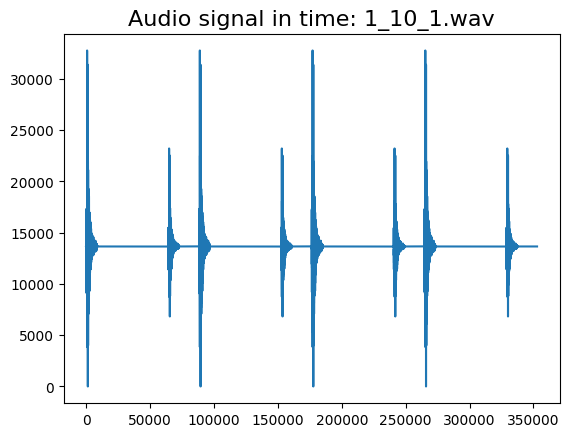

In [ ]:
plt.plot(aplausos1data)
plt.title('Audio signal in time: ' + aplausos1, size=16)
plt.show()  # Mostrar la gráfica explicitamente

In [14]:
import IPython.display as ipd

In [15]:
ipd.Audio('1_10_1.wav')

Cargaremos 2 audios mas para pruebas

In [70]:
ipd.Audio('1_11_1.wav')

In [71]:
ipd.Audio('1_10_25.wav')

In [16]:
aplausos2 = '1_11_1.wav'
campanas = '1_10_25.wav'

_, aplausos2data = wavfile.read(aplausos2)
_, campanas_data = wavfile.read(campanas)

In [17]:
# Estandarizar los datos
data1 = (aplausos1data - aplausos1data.mean())/(aplausos1data.max()-aplausos1data.min())
data2 = (aplausos2data - aplausos2data.mean())/(aplausos2data.max()-aplausos2data.min())
data3 = (campanas_data - campanas_data.mean())/(campanas_data.max()-campanas_data.min())

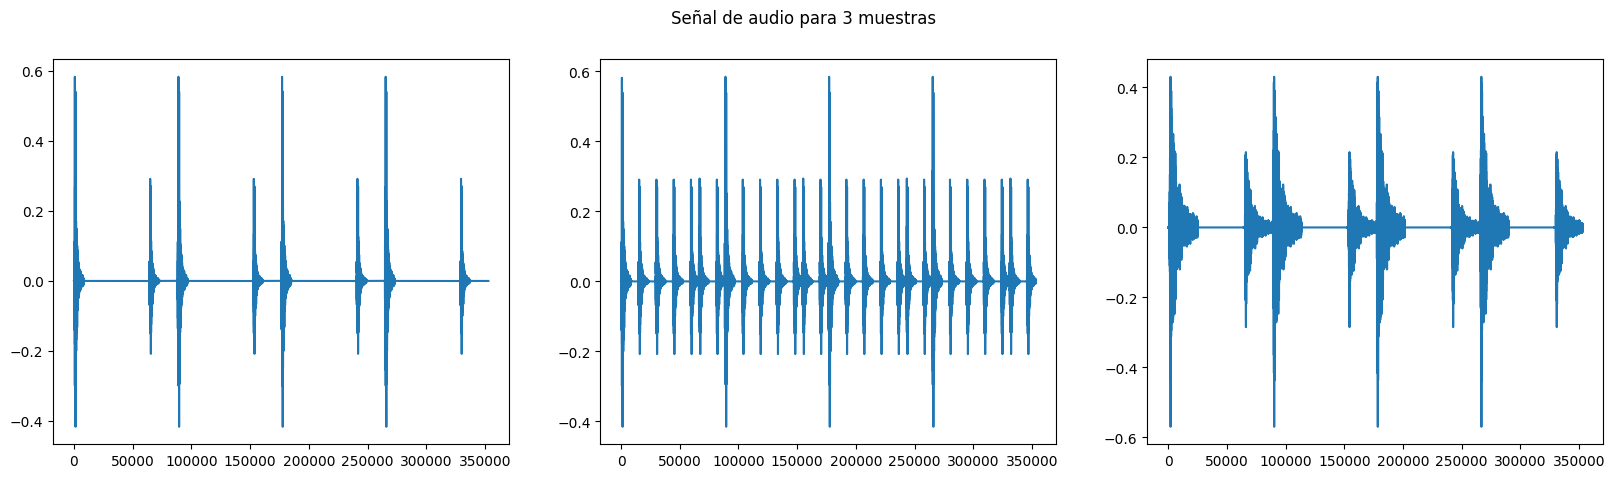

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Señal de audio para 3 muestras')
ax1.plot(data1)
ax2.plot(data2)
ax3.plot(data3)

In [19]:
# Longitud de nuestros datos
print(data1.shape)
print(data2.shape)
print(data3.shape)

(352792,)
(352800,)
(352792,)


In [20]:
np.zeros(3)

array([0., 0., 0.])

In [21]:
data1 = np.append(data1, np.zeros(8))
data3 = np.append(data3, np.zeros(8))

In [22]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(352800,)
(352800,)
(352800,)


# Compararemos los audios usando varias métricas

Utilizaremos las siguientes métricas:
* Euclideana $||x||_2$
* Manhattan $||x||_1$
* Chebyshev $||x||_∞$
* Coseno $cos(\theta)$

In [ ]:
# Importamos las métricas
from scipy.spatial.distance import euclidean, cityblock, chebyshev, cosine

## Métrica Euclidiana

En general, la distancia euclidiana entre los puntos $$P=(p_1,p_2,\dots,p_n)$$ y $$Q=(q_1,q_2,\dots,q_n)$$ del espacio $\mathbb{R}^{n}$, se define como:

$$d_E(P,Q)=\sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + \cdots + (p_n-q_n)^2} = \sqrt{\sum_{i=1}^n (p_i-q_i)^2}.$$

## ¿Como es el círculo unitario con la métrica Euclidiana?

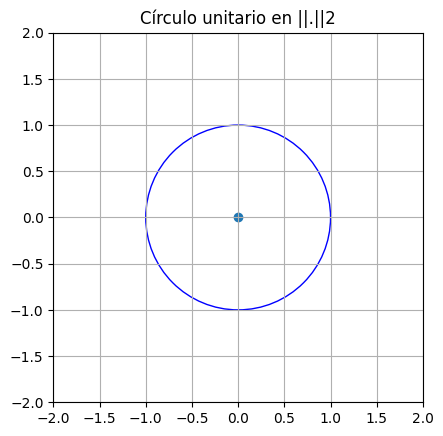

In [ ]:
figure, axes = plt.subplots()
axes.set_xlim((-2, 2))
axes.set_ylim((-2, 2))

draw_circle = plt.Circle((0, 0), 1, fill=False, color='blue')
axes.set_aspect(1)
axes.add_artist(draw_circle)

plt.scatter(0,0)
plt.grid()
plt.title('Círculo unitario en ||.||2')
plt.show()

## Primer ejemplo con distancia Euclidiana:

In [26]:
vec1 = np.array([1,2])
vec2 = np.array([2,4])
# Notar la dependencia lineal (linealmente dependientes)

print(f'vec1 = {vec1}, vec2 = {vec2}')

vec1 = [1 2], vec2 = [2 4]


In [27]:
distancia = euclidean(vec1, vec2)
print(distancia)

2.23606797749979


In [28]:
euclidean(vec1, vec2) == np.sqrt(5)

True

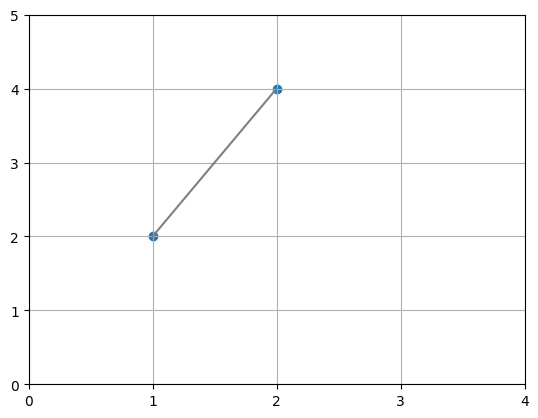

In [29]:
plt.scatter([vec1[0], vec2[0]], 
            [vec1[1], vec2[1]])

plt.plot([vec1[0], vec2[0]], [vec1[1], vec2[1]], color='grey')

plt.xlim(0, 3)
plt.ylim(0, 5)
plt.xticks(range(0,5))
plt.grid()

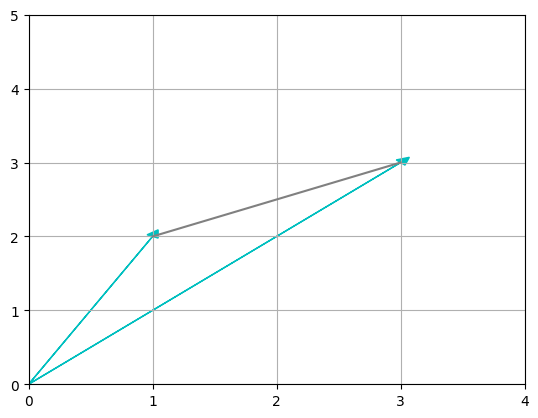

In [30]:
vec1 = np.array([1,2])
vec2 = np.array([3,3])

plt.arrow(0, 0, vec1[0], vec1[1], head_width=0.1, head_length=0.1, fc='c', ec='c')
plt.arrow(0, 0, vec2[0], vec2[1], head_width=0.1, head_length=0.1, fc='c', ec='c')

plt.plot([vec1[0], vec2[0]], [vec1[1], vec2[1]], color='grey')

plt.xlim(0, 3)
plt.ylim(0, 5)
plt.xticks(range(0,5))
plt.grid()

Probemos ahora con nuestros audios

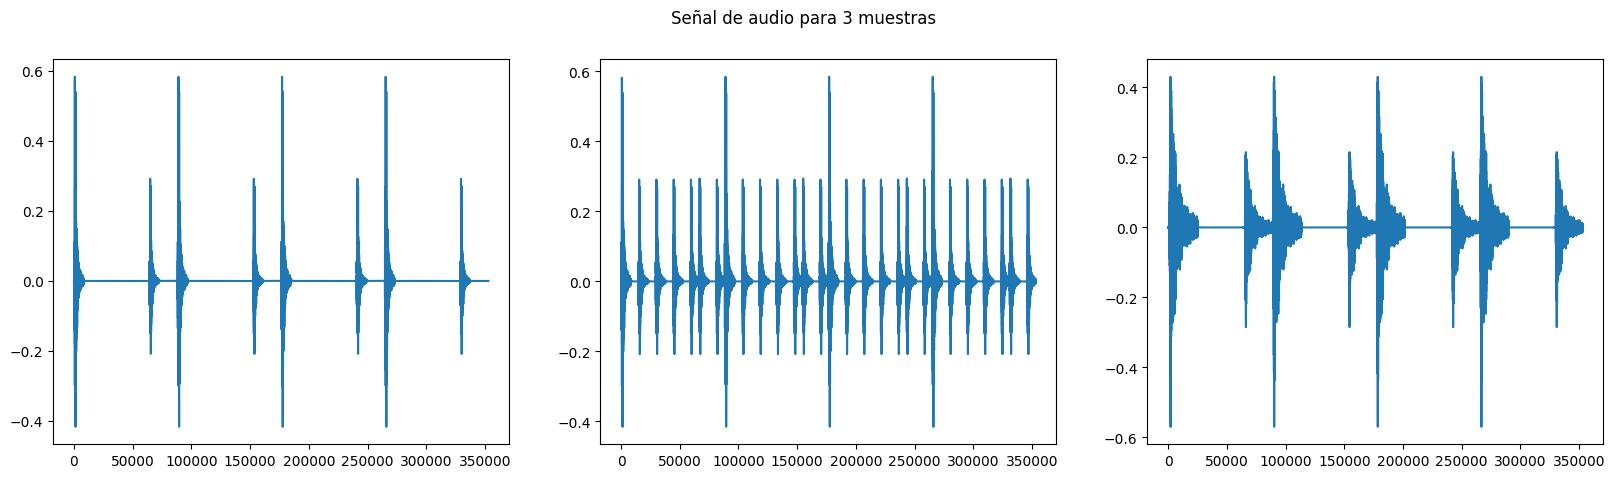

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Señal de audio para 3 muestras')
ax1.plot(data1)
ax2.plot(data2)
ax3.plot(data3)

In [33]:
de_1_a_2 = euclidean(data1, data2)
print(f'La distancia entre {aplausos1} y {aplausos2} es: {de_1_a_2}')

La distancia entre 1_10_1.wav y 1_11_1.wav es: 13.416703631715217


In [34]:
de_1_a_3 = euclidean(data1, data3)
print(f'La distancia entre {aplausos1} y {campanas} es: {de_1_a_3}')

La distancia entre 1_10_1.wav y 1_10_25.wav es: 21.102680389296566


In [35]:
de_2_a_3 = euclidean(data2, data3)
print(f'La distancia entre {aplausos2} y {campanas} es: {de_2_a_3}')

La distancia entre 1_11_1.wav y 1_10_25.wav es: 23.013014929165767


## Métrica Manhattan (taxista)

Se define como:

$$ d_1(P, Q) = \|P - Q\|_1 = \sum_{i=1}^n |p_i-q_i|$$

## ¿Cómo es el círculo unitario con la métrica Manhattan?

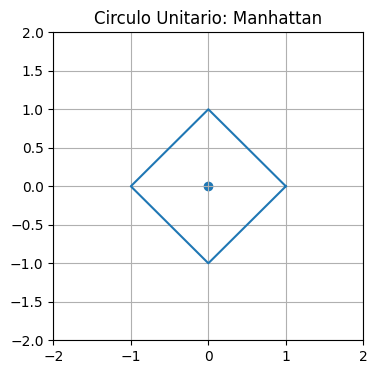

In [36]:
plt.figure(figsize = (4, 4))
plt.plot([1, 0, -1, 0, 1], 
         [0, 1, 0, -1, 0])

plt.scatter(0,0)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.title('Circulo Unitario: Manhattan')
plt.show()

Primer ejemplo:

In [37]:
vec2 = [2, 4]
print(vec1, vec2)

[1 2] [2, 4]


In [39]:
distancia = cityblock(vec1, vec2)
print(distancia)

3


Comparamos los audios con la métrica Manhattan

In [40]:
de_1_a_2 = cityblock(data1, data2)
print(f'La distancia entre {aplausos1} y {aplausos2} es: {de_1_a_2}')

La distancia entre 1_10_1.wav y 1_11_1.wav es: 3298.0939600315346


In [42]:
de_1_a_3 = cityblock(data1, data3)
print(f'La distancia entre {aplausos1} y {campanas} es: {de_1_a_3}')

La distancia entre 1_10_1.wav y 1_10_25.wav es: 5279.124179699486


In [43]:
de_2_a_3 = cityblock(data2, data3)
print(f'La distancia entre {aplausos2} y {campanas} es: {de_2_a_3}')

La distancia entre 1_11_1.wav y 1_10_25.wav es: 6880.201609765174


## Métrica Chebyshev

Esta se calcula de la siguiente forma:

$$D_{\rm Chebyshev}(P,Q) := \max_i(|p_i - q_i|).\ $$

Esto equivale al límite de la métrica en un espacio $L_{p}$:

$$ \lim_{k \to \infty} \bigg( \sum_{i=1}^n \left| p_i - q_i \right|^k \bigg)^{1/k} $$

Text(0.5, 1.0, 'Circulo Unitario: Chebyshev')

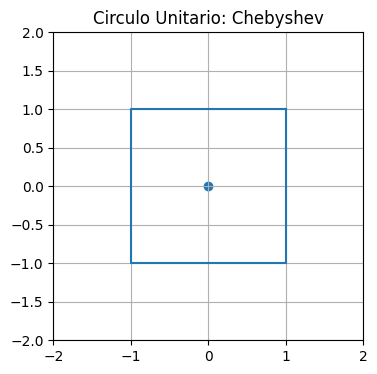

In [44]:
plt.figure(figsize = (4, 4))
plt.plot([1, -1, -1, 1, 1], [1, 1, -1, -1, 1])

plt.scatter(0,0)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.title('Circulo Unitario: Chebyshev')

Primer ejemplo con la métrica del máximo

In [45]:
print(vec1, vec2)

[1 2] [2, 4]


In [46]:
distancia = chebyshev(vec1, vec2)
print(distancia)

2


In [ ]:
de_1_a_2 = chebyshev(data1, data2)
print(f'La distancia entre {aplausos1} y {aplausos2} es: {de_1_a_2}')

La distancia entre 1_10_1.wav y 1_11_1.wav es: 0.8273290474393986


In [47]:
de_1_a_3 = chebyshev(data1, data3)
print(f'La distancia entre {aplausos1} y {campanas} es: {de_1_a_3}')

La distancia entre 1_10_1.wav y 1_10_25.wav es: 0.6493832816262511


In [48]:
de_2_a_3 = chebyshev(data2, data3)
print(f'La distancia entre {aplausos2} y {campanas} es: {de_2_a_3}')

La distancia entre 1_11_1.wav y 1_10_25.wav es: 0.6491724261145098


¿Cómo se ven comparadas éstas 3 métricas?

<center>
  <img src='https://miro.medium.com/max/932/1*M0RdonZ00ooTGhx2kt7uKQ.png'>
<\center>

## Métrica Similaridad Coseno

Se obtiene de la siguiente manera:

$$ S_C (P,Q):= \cos(\theta) = {P \cdot Q \over \|P\| \|Q\|} = \frac{ \sum\limits_{i=1}^{n}{p_i  q_i} }{ \sqrt{\sum\limits_{i=1}^{n}{p_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{q_i^2}} }$$

Donde $\theta$ es el angulo entre los vectores $P$ y $Q$.

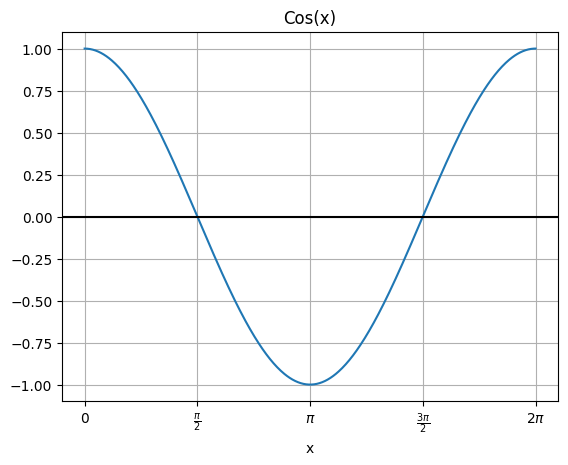

In [49]:
x = np.linspace(0, 2 * np.pi, 500)

y = np.cos(x)
plt.plot(x, y)
plt.axhline(y=0, color='black', linestyle='-')

xticks = np.arange(0, 2 * np.pi + np.pi/2, np.pi / 2)
xtick_labels = ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
plt.xticks(xticks, xtick_labels)

plt.title("Cos(x)")
plt.xlabel("x")

plt.grid(True)
plt.show()

In [50]:
help(cosine)

Help on function cosine in module scipy.spatial.distance:

cosine(u, v, w=None)
    Compute the Cosine distance between 1-D arrays.
    
    The Cosine distance between `u` and `v`, is defined as
    
    .. math::
    
        1 - \frac{u \cdot v}
                  {\|u\|_2 \|v\|_2}.
    
    where :math:`u \cdot v` is the dot product of :math:`u` and
    :math:`v`.
    
    Parameters
    ----------
    u : (N,) array_like
        Input array.
    v : (N,) array_like
        Input array.
    w : (N,) array_like, optional
        The weights for each value in `u` and `v`. Default is None,
        which gives each value a weight of 1.0
    
    Returns
    -------
    cosine : double
        The Cosine distance between vectors `u` and `v`.
    
    Examples
    --------
    >>> from scipy.spatial import distance
    >>> distance.cosine([1, 0, 0], [0, 1, 0])
    1.0
    >>> distance.cosine([100, 0, 0], [0, 1, 0])
    1.0
    >>> distance.cosine([1, 1, 0], [0, 1, 0])
    0.29289321881345

Scipy regresa la distancia del coseno:

$$ d_C (P,Q):= 1 - {P \cdot Q \over \|P\| \|Q\|} $$

Nosotros usaremos la similitud del coseno:

$$ S_C (P,Q) = 1 - d_C = \cos(\theta)$$

la cual está acotada entre -1 y 1 en virtud de la función $\cos(\theta)$.




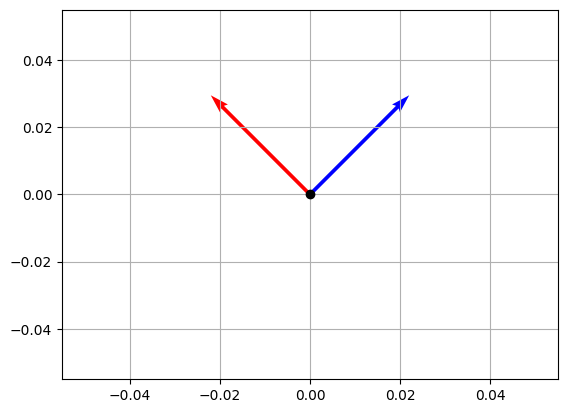

In [52]:
# Comparemos los vectores (1,1) y (-1,1)
V = np.array([[1,1], [-1,1]])
origin = np.array([[0, 0],[0, 0]]) # punto origen

plt.plot(0,0,'ok')
plt.quiver(*origin, V[:,0], V[:,1], color=['b','r'], scale=5)
plt.grid()
plt.show()

In [53]:
# ¿Cómo acceder a renglones o columnas?
V[:,0]

array([ 1, -1])

In [54]:
cos = cosine(np.array([1,1]), np.array([-1,-1]))
print(cos)

2.0


In [55]:
cos = 1 - cosine(np.array([1,1]), np.array([-1,1]))
print(cos)

0.0


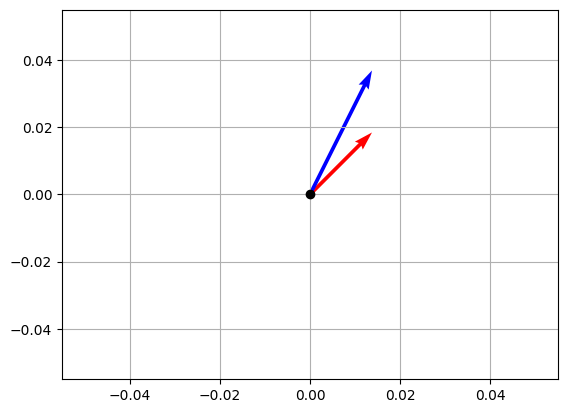

In [56]:
# Comparemos los vectores (1,1) y (1,2)
V = np.array([[1,1], [1,2]])
origin = np.array([[0, 0],[0, 0]]) # punto origen

plt.plot(0,0,'ok')
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=8)
plt.grid()
plt.show()

In [57]:
# Distancia
dcos = cosine(np.array([1,1]), np.array([1,2]))
print(dcos)

0.05131670194948623


In [58]:
# Similitud (esta es la que nos interesa)
scos = 1 - cosine(np.array([1,1]), np.array([1,2]))
print(scos)

0.9486832980505138


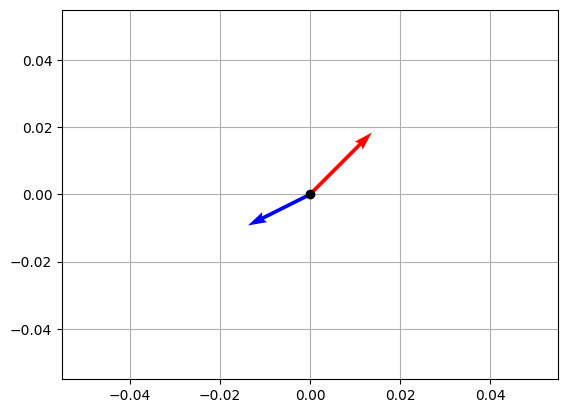

In [59]:
# Comparemos los vectores (1,1), (1, -0.5)
V = np.array([[1,1], [-1,-0.5]])
origin = np.array([[0, 0],[0, 0]]) # punto origen

plt.plot(0,0,'ok')
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=8)
plt.grid()
plt.show()

In [60]:
# Distancia
dcos = cosine(np.array([1,1]), np.array([-1,-.5]))
print(dcos)

1.9486832980505138


In [61]:
scos = 1 - cosine(np.array([1,1]), np.array([-1,-.5]))
print(scos)

-0.9486832980505138


Usemos la similitud ahora con nuestros datos:

In [62]:
de_1_a_2 = cosine(data1, data2)
print(f'La similitud entre {aplausos1} y {aplausos2} es: {1 - de_1_a_2}')

La similitud entre 1_10_1.wav y 1_11_1.wav es: 0.3538305042886385


In [63]:
de_1_a_3 = cosine(data1, data3)
print(f'La similitud entre {aplausos1} y {campanas} es: {1 - de_1_a_3}')

La similitud entre 1_10_1.wav y 1_10_25.wav es: -0.05431393352743319


In [64]:
de_2_a_3 = cosine(data2, data3)
print(f'La similitud entre {aplausos2} y {campanas} es: {1 - de_2_a_3}')

La similitud entre 1_11_1.wav y 1_10_25.wav es: -0.027951518389419228


# Usando todos los audios

¿Cuántos y que audios utilizaremos?

In [65]:
import glob

lista_audios = glob.glob('*.wav')
print(lista_audios)
print(len(lista_audios))

['1_12_13.wav', '1_13_1.wav', '1_15_25.wav', '1_11_1.wav', '1_15_5.wav', '1_15_1.wav', '1_11_5.wav', '1_10_13.wav', '1_13_5.wav', '1_14_5.wav', '1_10_1.wav', '1_13_25.wav', '1_12_1.wav', '1_14_13.wav', '1_12_5.wav', '1_10_5.wav', '1_14_1.wav', '1_11_25.wav', '1_14_25.wav', '1_13_13.wav', '1_11_13.wav', '1_15_13.wav', '1_12_25.wav', '1_10_25.wav']
24


Comparemos todos los audios contra el primero y veamos el resultado

In [66]:
import pandas as pd

In [80]:
df = pd.DataFrame()

for element in lista_audios:
  # Asociaremos nombre_del_audio con datos_del_audio
  dict = {}
  _, signal = wavfile.read(element)

  # Estandarizamos
  data_st = (signal - signal.mean())/(signal.max()-signal.min())

  # Ajustamos los tamaños de audio en caso de ser necesario
  if data_st.shape[0] == 352792:
    data_st = np.append(data_st, np.zeros(8))

  # Añadimos al dataframe
  dict = {'name': element, 'data': data_st}
  temp_df = pd.DataFrame([dict])
  df = pd.concat([df, temp_df])

In [77]:
df

name                                               data
0  1_12_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
0   1_13_1.wav  [5.00044220697467e-05, 5.00044220697467e-05, 5...
0  1_15_25.wav  [-0.00016833501185139745, -0.00016833501185139...
0   1_11_1.wav  [5.00044220697467e-05, 5.00044220697467e-05, 5...
0   1_15_5.wav  [2.3333338177518065e-05, 2.3333338177518065e-0...
0   1_15_1.wav  [4.521029986543904e-05, 4.521029986543904e-05,...
0   1_11_5.wav  [1.1338474006694954e-05, 1.1338474006694954e-0...
0  1_10_13.wav  [4.067012324286436e-05, 4.067012324286436e-05,...
0   1_13_5.wav  [8.268976301950387e-06, 8.268976301950387e-06,...
0   1_14_5.wav  [-1.7664057922947007e-07, -1.7664057922947007e...
0   1_10_1.wav  [1.6711858003176546e-05, 1.6711858003176546e-0...
0  1_13_25.wav  [-0.00013468082933115432, -0.00013468082933115...
0   1_12_1.wav  [5.00044220697467e-05, 5.00044220697467e-05, 5...
0  1_14_13.wav  [0.0001197803054853913, 0.0001197803054853913,...
0   1_12_5.wav  [8.267592242533605e-06, 8.267592242533605e-06,...
0   1_10_5.wav  [7.946324638750623e-06, 7.946324638750623e-06,...
0   1_14_1.wav  [4.521756617725224e-05, 4.521756617725224e-05,...
0  1_11_25.wav  [-0.00013468082933115432, -0.00013468082933115...
0  1_14_25.wav  [-0.00015732663600836057, -0.00015732663600836...
0  1_13_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
0  1_11_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
0  1_15_13.wav  [0.00011978860984178097, 0.0001197886098417809...
0  1_12_25.wav  [-0.00013468082933115432, -0.00013468082933115...
0  1_10_25.wav  [-5.476215693168442e-05, -5.476215693168442e-0...

In [ ]:
# Establecemos el índice como la columna 'name'.
# Esto permite el uso de df.loc('algún_nombre') para acceder renglones.
df.set_index('name', drop=True, inplace=True)
df

data
name                                                          
1_12_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
1_13_1.wav   [5.00044220697467e-05, 5.00044220697467e-05, 5...
1_15_25.wav  [-0.00016833501185139745, -0.00016833501185139...
1_11_1.wav   [5.00044220697467e-05, 5.00044220697467e-05, 5...
1_15_5.wav   [2.3333338177518065e-05, 2.3333338177518065e-0...
1_15_1.wav   [4.521029986543904e-05, 4.521029986543904e-05,...
1_11_5.wav   [1.1338474006694954e-05, 1.1338474006694954e-0...
1_10_13.wav  [4.067012324286436e-05, 4.067012324286436e-05,...
1_13_5.wav   [8.268976301950387e-06, 8.268976301950387e-06,...
1_14_5.wav   [-1.7664057922947007e-07, -1.7664057922947007e...
1_10_1.wav   [1.6711858003176546e-05, 1.6711858003176546e-0...
1_13_25.wav  [-0.00013468082933115432, -0.00013468082933115...
1_12_1.wav   [5.00044220697467e-05, 5.00044220697467e-05, 5...
1_14_13.wav  [0.0001197803054853913, 0.0001197803054853913,...
1_12_5.wav   [8.267592242533605e-06, 8.267592242533605e-06,...
1_10_5.wav   [7.946324638750623e-06, 7.946324638750623e-06,...
1_14_1.wav   [4.521756617725224e-05, 4.521756617725224e-05,...
1_11_25.wav  [-0.00013468082933115432, -0.00013468082933115...
1_14_25.wav  [-0.00015732663600836057, -0.00015732663600836...
1_13_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
1_11_13.wav  [7.109290242581972e-05, 7.109290242581972e-05,...
1_15_13.wav  [0.00011978860984178097, 0.0001197886098417809...
1_12_25.wav  [-0.00013468082933115432, -0.00013468082933115...
1_10_25.wav  [-5.476215693168442e-05, -5.476215693168442e-0...

In [ ]:
# Comparemos aplausos1 contra todos los otros audio
df_comp = pd.DataFrame()
base = '1_10_1.wav'
i = 0

for element in lista_audios:
  aux_dict = {}
  medida = 1 - cosine(df.loc[base, 'data'], df.loc[element, 'data'])
  aux_dict = {'name': element, base: medida}
  df_comp = pd.concat([df_comp, pd.DataFrame([aux_dict], index=[i])])
  i+=1

In [83]:
df_comp

name  1_10_1.wav
0   1_12_13.wav   -0.000472
1    1_13_1.wav    0.353002
2   1_15_25.wav   -0.008094
3    1_11_1.wav    0.353831
4    1_15_5.wav   -0.001054
5    1_15_1.wav    0.352791
6    1_11_5.wav   -0.001202
7   1_10_13.wav   -0.000537
8    1_13_5.wav   -0.001209
9    1_14_5.wav   -0.000750
10   1_10_1.wav    1.000000
11  1_13_25.wav   -0.009539
12   1_12_1.wav    0.353002
13  1_14_13.wav   -0.000312
14   1_12_5.wav   -0.001235
15   1_10_5.wav   -0.001143
16   1_14_1.wav    0.353153
17  1_11_25.wav   -0.011806
18  1_14_25.wav   -0.010225
19  1_13_13.wav   -0.000472
20  1_11_13.wav   -0.000428
21  1_15_13.wav   -0.000409
22  1_12_25.wav   -0.009018
23  1_10_25.wav   -0.054314

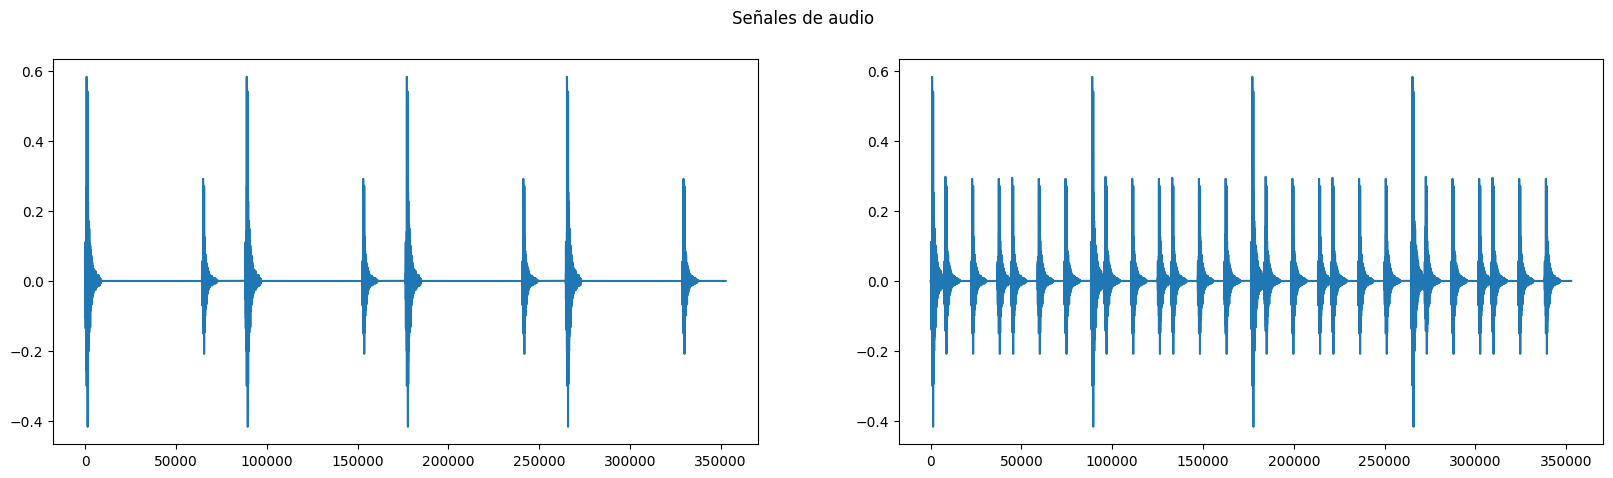

In [87]:
base = '1_10_1.wav'
a_comparar = '1_14_1.wav'

data1 = df.loc[base]
data2 = df.loc[a_comparar]

# Comparador
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Señales de audio')
ax1.plot(data1.values[0])
ax2.plot(data2.values[0])


In [88]:
ipd.Audio(base)

In [89]:
ipd.Audio(a_comparar)

# Ejercicio

Crear una tabla en la que se comparen todos los audios contra todos

In [90]:
# Hint: pensar en qué se guardará en la entrada (i, j) de la matriz
M = np.zeros((24,24))
M

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 